<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/bigdata_RaeJung_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 104_지도학습_평가

## 1.회귀 평가

### 1.1 회귀 평가 지표

In [2]:
!git clone https://github.com/leeraejung/RaejungLecture-MachineLearning.git

Cloning into 'RaejungLecture-MachineLearning'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 711 (delta 0), reused 5 (delta 0), pack-reused 703 (from 1)
Receiving objects: 100% (711/711), 50.53 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (692/692), done.


In [3]:
!pip install numpy matplotlib scikit-learn pandas
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.0 MB/s eta 0:00:00


In [4]:
import logging
import matplotlib.pyplot as plt

# 로그 레벨 설정
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

### 1.8.1 회귀 예제 데이터 - diabetes

### 1.2 선형 회귀 적용 - 보스턴 집값 예측

#### 1.2.1 데이터 로딩

In [6]:
# 데이터 로딩
df = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/boston.csv')
print(df.shape)
df.columns

(506, 14)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [7]:
X = df.drop('target', axis=1).values
y = df['target'].values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2.2 데이터 탐색

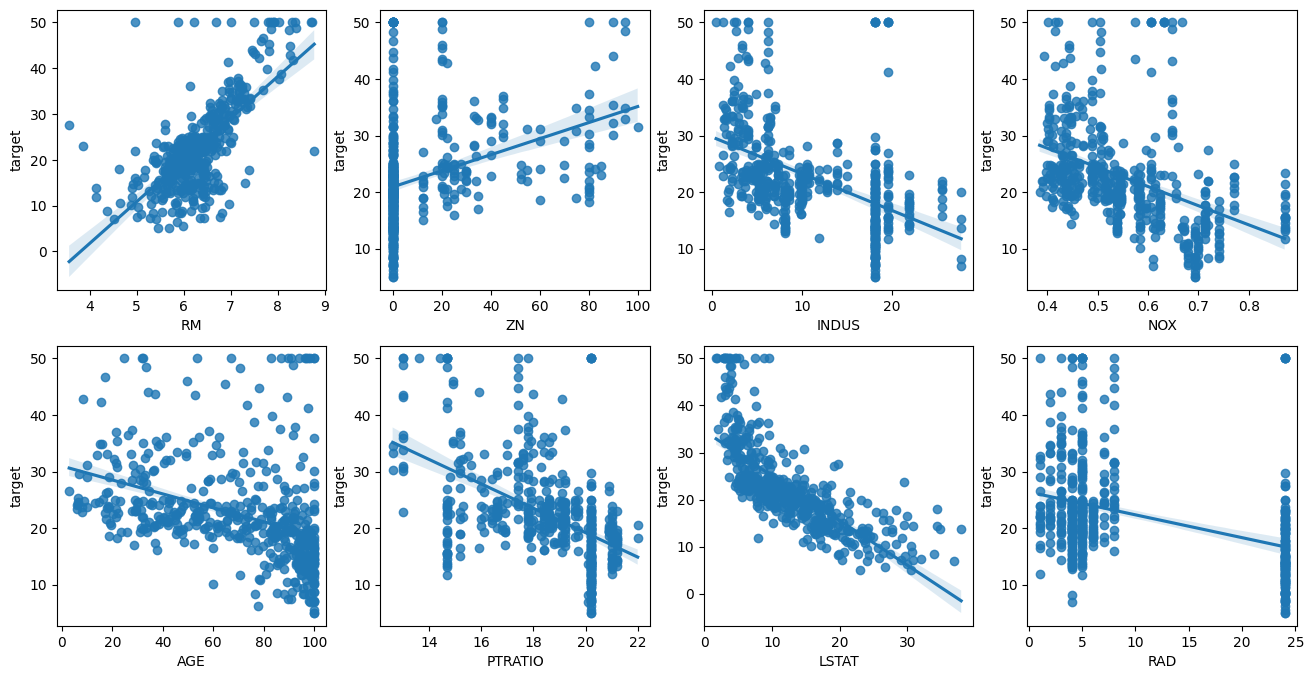

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

col_list = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(col_list):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

plt.show()

#### 1.2.3 선형 회귀 분석

In [9]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [10]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression(fit_intercept=True)

In [11]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 결과 예측
pred = model.predict(X_test)
print(pred.shape)
pred

(127,)


array([16.29286997, 27.88790589, 39.41456053, 18.37096451, 30.16518358,
       37.77794671, 25.36606436, 10.39741797, 14.74083652, 31.73078036,
       28.79292061, 19.1471567 , 13.81677825, 31.83932417, 16.49252123,
       21.47578303, 20.38810822, 37.71686776, 18.11178137, 15.78990777,
       13.7771029 , 24.49111234, 33.08173484, 39.52018398, 31.52573143,
       22.34110087, 17.65956144, 20.81329507, 23.34233612, 20.61052169,
       25.84461476, 33.97409459, 15.35704895, 21.95151795, 24.08989232,
       34.77474387, 29.21132206, 18.24716868, 13.92911938, 38.43793451,
       31.00188414, 18.77580256, 19.7698502 , 40.50221132,  8.12937003,
       27.19648109, 19.26132809, 25.65669217, 15.45600034, 25.92350904,
       34.75585974, 24.34306909, 19.59508197, 12.40858537, 24.55946383,
       17.97968819,  9.72456537,  2.27891777, 31.46417649, 13.59430001,
       19.99441875, 22.53304075, 20.26468044, 17.83848399, 25.05876782,
       27.03508049, 25.90862078, 22.28206346, 24.65401423, 30.38

#### 1.2.4 선형 회귀 평가

In [13]:
from sklearn import metrics

In [14]:
# Coefficient
model.coef_

array([-9.78910352e-02,  4.27789348e-02,  5.91493507e-02,  1.23149832e+00,
       -1.54902558e+01,  4.35215724e+00, -4.69136797e-04, -1.37720645e+00,
        2.82085749e-01, -1.24919445e-02, -9.40011503e-01,  6.62260713e-03,
       -5.48551054e-01])

In [15]:
# intercept
model.intercept_

32.47966480453227

In [16]:
# MAE(Mean Absolute Error)
metrics.mean_absolute_error(y_test, pred)

3.4377496008465154

In [17]:
# MSE(Mean Squared Error)
metrics.mean_squared_error(y_test, pred)

24.768530968608456

In [18]:
# RMSE(Root Mean Squared Error)
metrics.mean_squared_error(y_test, pred)**0.5

4.9767992694711385

In [19]:
# R square
metrics.r2_score(y_test, pred)

0.6862448857295769

In [20]:
# MAPE
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100

MAPE(y_test, pred)

16.631873933714093

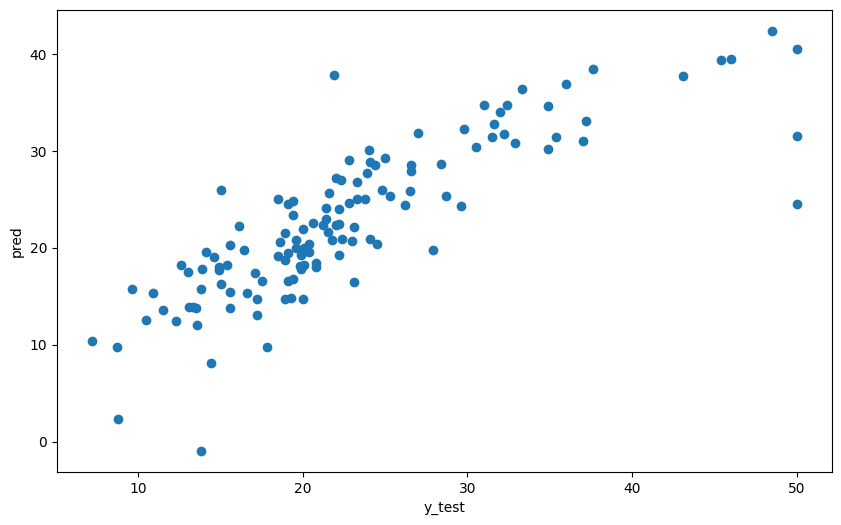

In [21]:
# Regression plot
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

#### 1.2.5 cross_val_score

In [22]:
from sklearn.model_selection import cross_val_score
neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

scores = np.sqrt(-1 * neg_scores)

print('교차 검증 점수: ', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수:  [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
교차 검증 평균 점수: 5.83


## 2.분류 평가

### Accuracy,Precision, Recall, F1-score, ROC Curve, AUC

### 2.1 불균형 데이터 셋

In [23]:
# 데이터 로딩
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
# 불균형 데이터 셋 생성
X = digits.data
y = digits.target == 9

In [25]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#### 2.1.1 더미 분류기 1 - 빈도 기반

In [26]:
from sklearn.dummy import DummyClassifier

model_dummy1 = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy1 = model_dummy1.predict(X_test)

In [27]:
model_dummy1.score(X_test, y_test)

0.9066666666666666

#### 2.1.2 더미 분류기 2 - 무작위

In [28]:
model_dummy2 = DummyClassifier().fit(X_train, y_train)
pred_dummy2 = model_dummy2.predict(X_test)

In [29]:
model_dummy2.score(X_test, y_test)

0.9066666666666666

#### 2.1.3 결정 트리

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

In [31]:
model_tree.score(X_test, y_test)

0.9244444444444444

#### 2.1.4 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = model_logreg.predict(X_test)

In [33]:
model_logreg.score(X_test, y_test)

0.9888888888888889

### 2.2 오차 행렬(Confusion Matrix)

In [34]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print('Confusion Matrix:\n', confusion)

Confusion Matrix:
 [[404   4]
 [  1  41]]


In [35]:
pd.crosstab(y_test, pred_logreg, margins=True)

col_0,False,True,All
row_0,,,
False,404,4,408
True,1,41,42
All,405,45,450


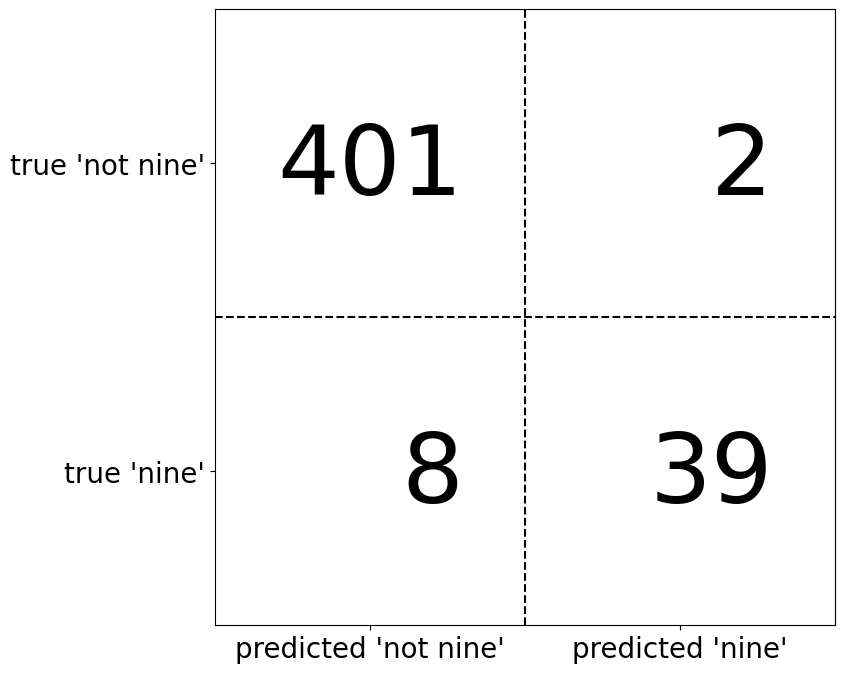

In [36]:
mglearn.plots.plot_confusion_matrix_illustration()

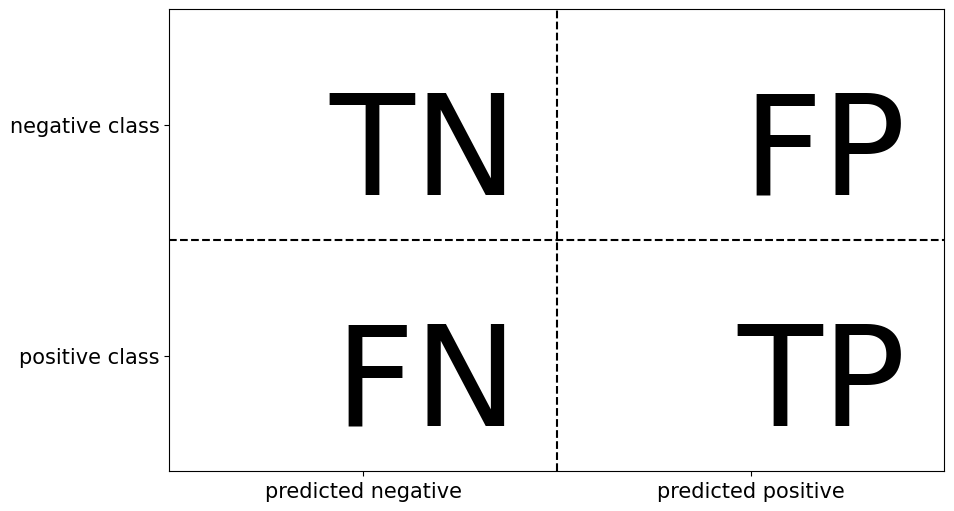

In [37]:
mglearn.plots.plot_binary_confusion_matrix()

#### 2.2.1 각 모델별 오차 행렬(Confusion Matrix)

In [38]:
print('1. 빈도 기반 더미 모델')
print(confusion_matrix(y_test, pred_dummy1))

print('\n2. 무작위 더미 모델')
print(confusion_matrix(y_test, pred_dummy2))

print('\n3. 결정 트리')
print(confusion_matrix(y_test, pred_tree))

print('\n4. 로지스틱 회귀')
print(confusion_matrix(y_test, pred_logreg))

1. 빈도 기반 더미 모델
[[408   0]
 [ 42   0]]

2. 무작위 더미 모델
[[408   0]
 [ 42   0]]

3. 결정 트리
[[383  25]
 [  9  33]]

4. 로지스틱 회귀
[[404   4]
 [  1  41]]


### 2.3 분류 평가 지표

#### (정확도(Accuracy)), (정밀도(Precision)), (재현율(Recall)), (F1 스코어)

In [39]:
# Accuracy
metrics.accuracy_score(y_test, pred_logreg)

0.9888888888888889

In [40]:
# Precision
metrics.precision_score(y_test, pred_logreg)

0.9111111111111111

In [41]:
# Recall
metrics.recall_score(y_test, pred_logreg)

0.9761904761904762

In [42]:
# F1-score
metrics.f1_score(y_test, pred_logreg)

0.9425287356321839

#### 2.3.1 각 모델별 F1-score

In [43]:
from sklearn.metrics import f1_score

print('1. 빈도 기반 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy1)))
print('2. 무작위 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy2)))
print('3. 결정 트리: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('4. 로지스틱 회귀: {:.2f}'.format(f1_score(y_test, pred_logreg)))

1. 빈도 기반 더미 모델: 0.00
2. 무작위 더미 모델: 0.00
3. 결정 트리: 0.66
4. 로지스틱 회귀: 0.94


#### 2.3.2 각 모델별 Classification Report

In [44]:
# 1. 빈도 기반 더미 모델
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy1, target_names=['9 아님', '9'],
                            zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.91      1.00      0.95       408
           9       0.00      0.00      0.00        42

    accuracy                           0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.82      0.91      0.86       450



In [45]:
# 2. 무작위 더미 모델
print(classification_report(y_test, pred_dummy2, target_names=['9 아님', '9'],
                            zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.91      1.00      0.95       408
           9       0.00      0.00      0.00        42

    accuracy                           0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.82      0.91      0.86       450



In [46]:
# 3. 결정 트리
print(classification_report(y_test, pred_tree, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      0.94      0.96       408
           9       0.57      0.79      0.66        42

    accuracy                           0.92       450
   macro avg       0.77      0.86      0.81       450
weighted avg       0.94      0.92      0.93       450



In [47]:
# 4. 로지스틱 회귀
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       1.00      0.99      0.99       408
           9       0.91      0.98      0.94        42

    accuracy                           0.99       450
   macro avg       0.95      0.98      0.97       450
weighted avg       0.99      0.99      0.99       450



#### 2.3.3 임계값 조정

In [48]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [49]:
# 데이터 로딩
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 모델 생성 및 학습
svc = SVC(gamma=0.05).fit(X_train, y_train)

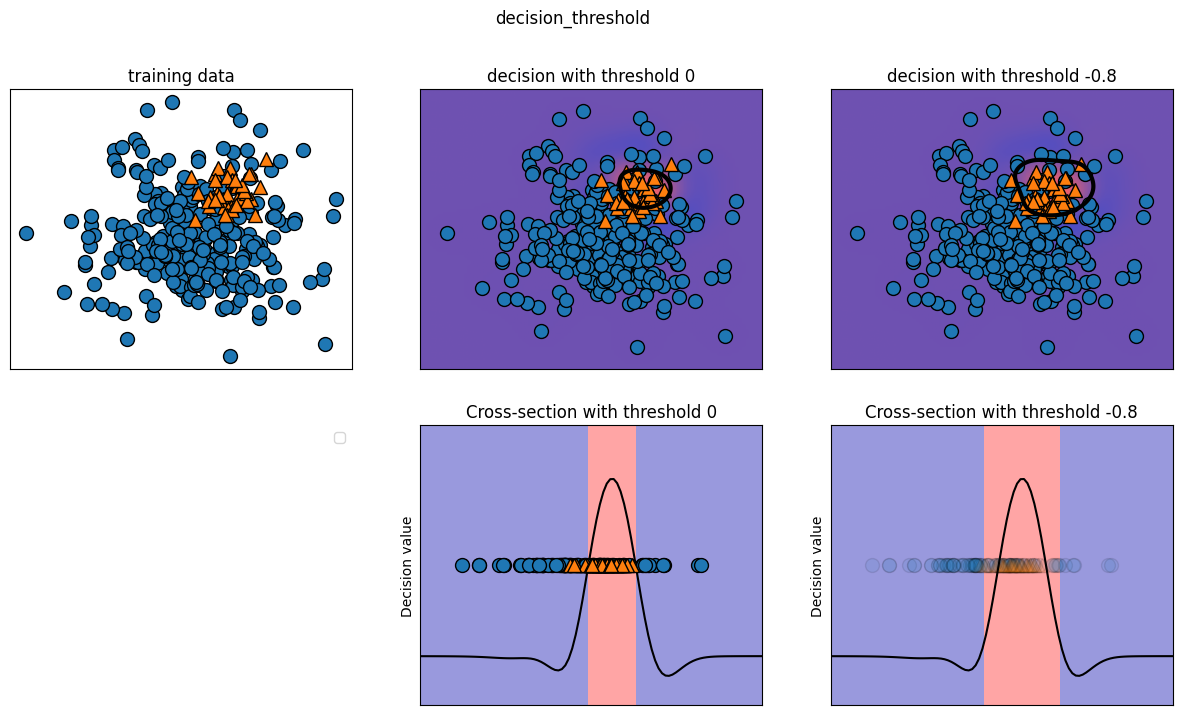

In [50]:
mglearn.plots.plot_decision_threshold()

In [51]:
# Classification Report - threshold: 0.5
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.60      0.82      0.69        11

    accuracy                           0.93       113
   macro avg       0.79      0.88      0.83       113
weighted avg       0.94      0.93      0.93       113



In [52]:
print(y_test.shape, svc.predict(X_test).shape)

(113,) (113,)


In [53]:
# 임계값 수정된 결과 예측
pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [54]:
# Classification Report - lower threshold
print(classification_report(y_test, pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.55      1.00      0.71        11

    accuracy                           0.92       113
   macro avg       0.78      0.96      0.83       113
weighted avg       0.96      0.92      0.93       113



#### 2.3.4 ROC Curve

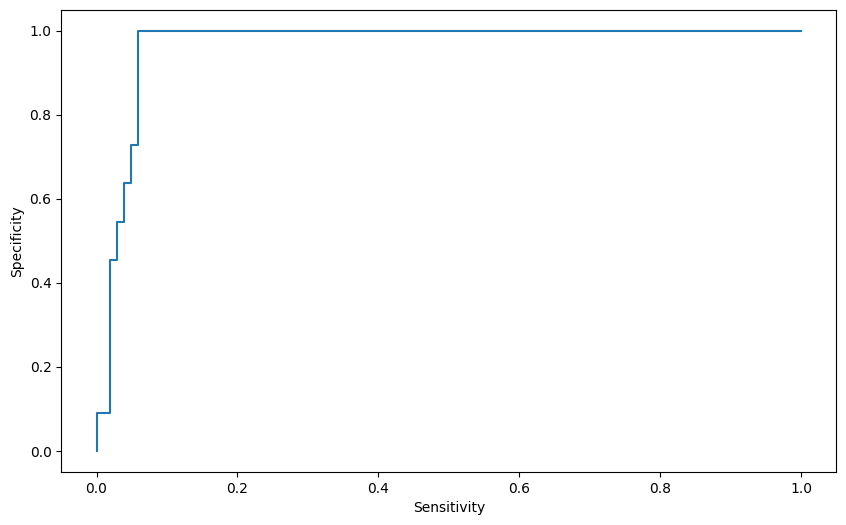

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')   # 특이도
plt.show()

In [56]:
# 데이터 로딩 및 분할
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 데이터 로딩
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [57]:
# SVC 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(gamma=0.05)
svc.fit(X_train, y_train)

SVC(gamma=0.05)

In [58]:
# 랜덤 포레스트 모델 생성 및 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=123, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=123)

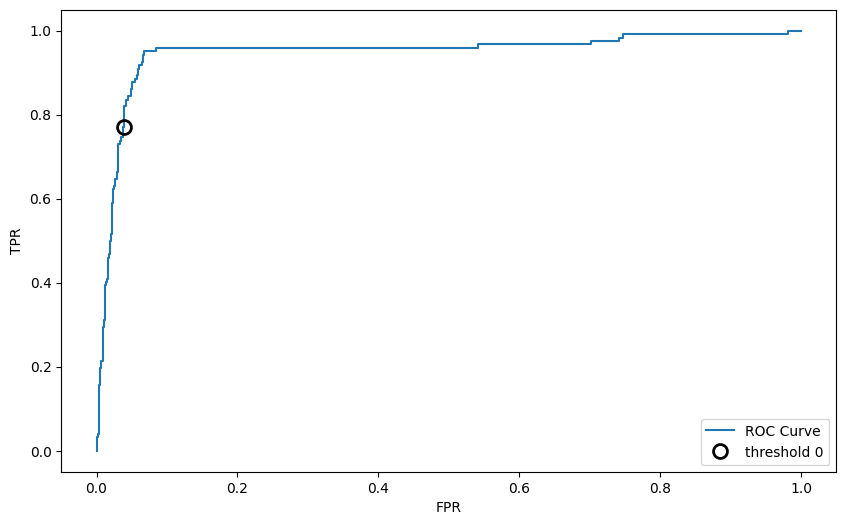

In [59]:
# ROC Curve - SVC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')  # 재현율

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

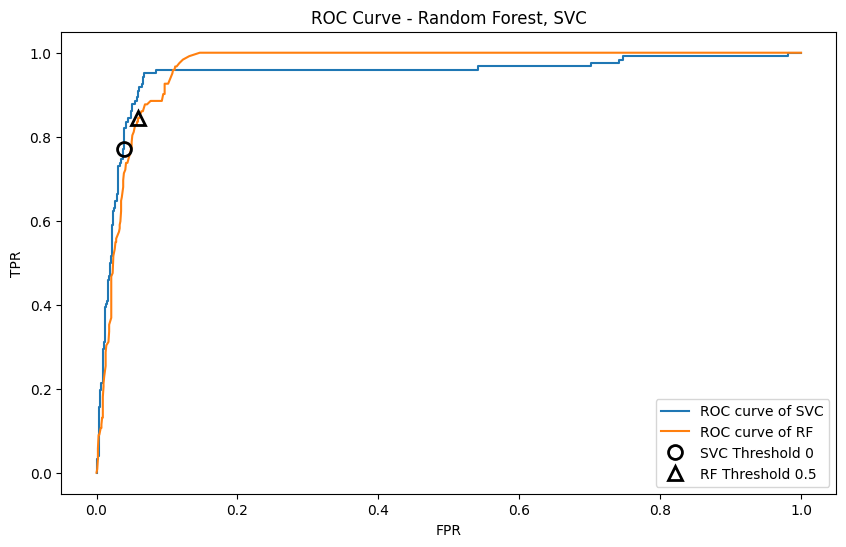

In [60]:
# ROC Curve - Random Forest, SVC

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC curve of SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC curve of RF')

plt.title('ROC Curve - Random Forest, SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')  # 재현율

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='SVC Threshold 0', fillstyle='none', c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_zero], tpr_rf[close_zero], '^', markersize=10,
         label='RF Threshold 0.5', fillstyle='none', c='k', mew=2)

plt.legend(loc=4)
plt.show()

#### 2.3.5 AUC

In [61]:
from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [62]:
print('AUC - SVC: {:.3f}\n'.format(svc_auc))
print('AUC - RandomForest: {:.3f}'.format(rf_auc))

AUC - SVC: 0.948

AUC - RandomForest: 0.965


In [63]:
# 불균형 데이터 셋 ROC Curve

X = digits.data
y = digits.target == 9

In [64]:
print(X.shape, y.shape)

(1797, 64) (1797,)


gamma = 1.00  정확도 = 0.91  AUC = 0.50
gamma = 0.10  정확도 = 0.91  AUC = 0.95
gamma = 0.01  정확도 = 0.91  AUC = 1.00


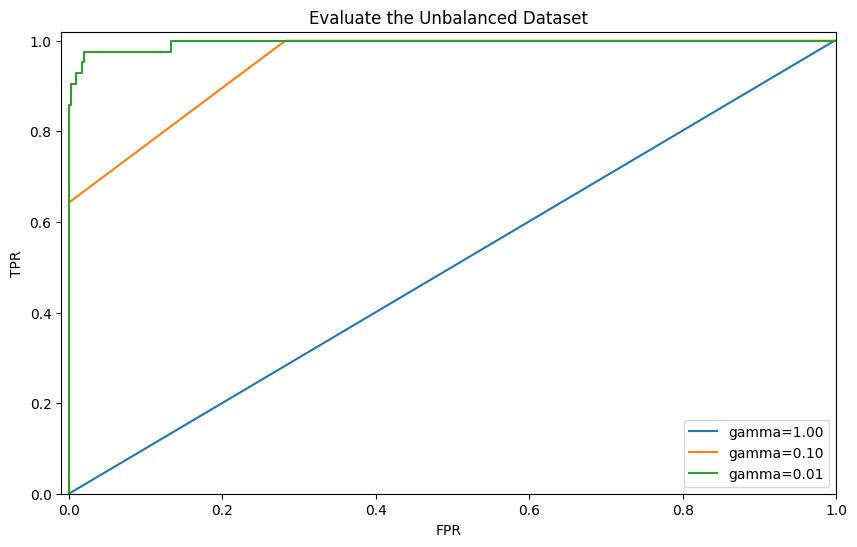

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print('gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))

plt.title('Evaluate the Unbalanced Dataset')   # 불균형 데이터 셋 평가
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')
plt.show()

#### 2.3.6 cross_val_score

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
# Accracy
acc = cross_val_score(SVC(), X, y, scoring='accuracy', cv=5)
print('Accuracy')
print('교차 검증 점수: ', acc)
print('교차 검증 평균 점수: {:.2f}'.format(acc.mean()))

Accuracy
교차 검증 점수:  [0.975      0.99166667 1.         0.99442897 0.98050139]
교차 검증 평균 점수: 0.99


In [68]:
# Average precision
ap = cross_val_score(SVC(), X, y, scoring='average_precision', cv=5)
print('Average Precision')
print('교차 검증 점수: ', ap)
print('교차 검증 평균 점수: {:.2f}'.format(ap.mean()))

Average Precision
교차 검증 점수:  [0.97562403 0.9886322  1.         0.99853801 0.95015534]
교차 검증 평균 점수: 0.98


In [69]:
# Recall macro
rm = cross_val_score(SVC(), X, y, scoring='recall_macro', cv=5)
print('Recall macro')
print('교차 검증 점수: ', rm)
print('교차 검증 평균 점수: {:.2f}'.format(rm.mean()))

Recall macro
교차 검증 점수:  [0.88734568 0.95833333 1.         0.97222222 0.90277778]
교차 검증 평균 점수: 0.94


### 2.4 다중 분류 평가 지표

In [70]:
X = digits.data
y = digits.target

In [71]:
# 데이터 분할

X_train ,X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 모델 생성 및 학습
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)

# 예측
pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9644444444444444

In [73]:
# Confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[51  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  0  0  0 51  0  0  1  0  0]
 [ 0  1  0  0  0 42  0  2  0  3]
 [ 0  1  0  0  0  1 46  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  4  0  0  0  0  0  0 41  0]
 [ 0  1  0  0  0  0  0  0  1 40]]


In [74]:
# scores_image = mglearn.tools.heatmap(
#     confusion_matrix(y_test, pred), xlabel='Predict Labels',
#     ylabel='True Labels', xticklabels=digits.target_names,
#     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
# plt.title('error matrix')   # 오차 행렬
# plt.gca().invert_yaxis()

In [75]:
# Classification Report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.86      1.00      0.92        42
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.99        40
           4       1.00      0.98      0.99        52
           5       0.98      0.88      0.92        48
           6       1.00      0.96      0.98        48
           7       0.93      1.00      0.96        41
           8       0.98      0.91      0.94        45
           9       0.91      0.95      0.93        42

    accuracy                           0.96       450
   macro avg       0.97      0.97      0.96       450
weighted avg       0.97      0.96      0.96       450



In [76]:
# f1-score

print('macro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('micro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('weigthted 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='weighted')))

macro 평균 f1 점수: 0.964
micro 평균 f1 점수: 0.964
weigthted 평균 f1 점수: 0.965


## EOF

# 105_선형회귀

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.선형 회귀

### 1.1 경사 하강법

#### 1.1.1 데이터 생성

In [78]:
np.random.seed(123)

# y = 4X + 6 + noise(random)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)
print(X.shape, y.shape)

(100, 1) (100, 1)


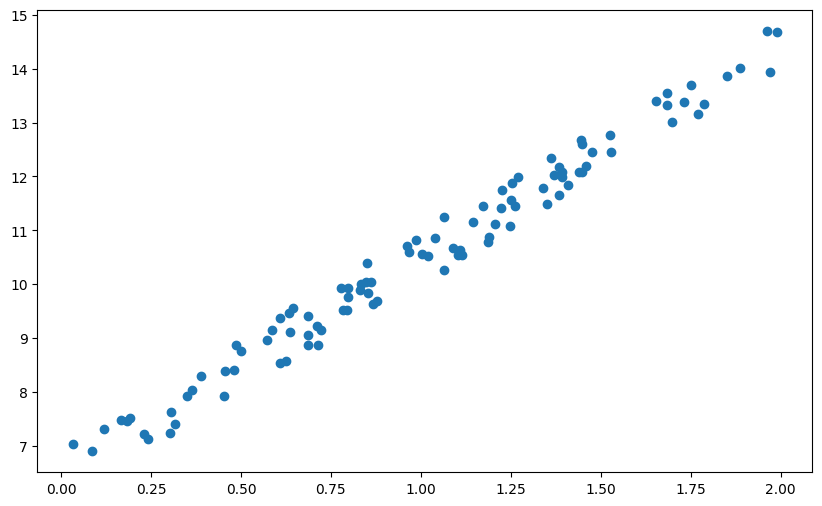

In [79]:
plt.scatter(X, y)
plt.show()

#### 1.1.2 가중치 업데이트 함수 정의

In [80]:
# 가중치 업데이트 함수 정의
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # w1_update, w0_update 0으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측값 계산 & 오차 계산(실제값 - 예측값)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

#### 1.1.3 경사하강법 적용 함수 정의

In [81]:
# w1, w0 업데이트: iters 만큼 반복 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # w1, w0 업데이트: iters 만큼 반복 적용
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

#### 1.1.4 비용 구하는 함수 정의

In [82]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square((y - y_pred))) / N
    return cost

#### 1.1.5 경사하강법 적용

In [83]:
# y = 4X + 6

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print('w1: {:.3f}   w0: {:.3f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {:.4f}'.format(get_cost(y, y_pred)))

w1: 3.946   w0: 6.559
Gradient Descent Total Cost: 0.0803


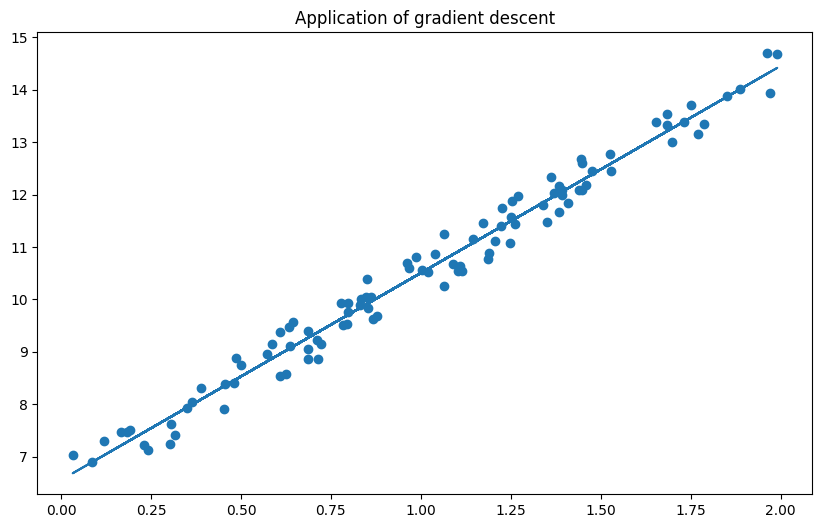

In [84]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.title('Application of gradient descent')   # 경사하강법 적용
plt.show()

#### 1.1.6 확률적 경사하강법(SGD) 적용 함수 정의

In [85]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    # w0, w1초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # sample_X, sample_y: batch_size만큼 랜덤 데이터 추출
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # w1, w0 업데이트: 추출된 부분 데이터 사용(sample_X, sample_y)
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [86]:
w1.shape, w0.shape

((1, 1), (1, 1))

#### 1.1.7 확률적 경사하강법(SGD) 적용

In [87]:
# y = 4X + 6

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:{:.3f} w0:{:.3f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

w1:4.109 w0:6.376
Stochastic Gradient Descent Total Cost:0.0871


### 1.2 선형 회귀 적용

In [88]:
# 데이터 로딩
df = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [89]:
X = df.drop('target', axis=1).values
y = df['target'].values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [91]:
X.shape

(506, 13)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Linear Regression: 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# Linear Regression: 예측, 평가
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [94]:
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R squared error: ', r2_score(y_test, pred))

MSE:  24.768530968608456
RMSE:  4.9767992694711385
R squared error:  0.6862448857295769


In [95]:
# 절편
lr.intercept_

32.47966480453227

In [96]:
# 회귀 계수
lr.coef_

array([-9.78910352e-02,  4.27789348e-02,  5.91493507e-02,  1.23149832e+00,
       -1.54902558e+01,  4.35215724e+00, -4.69136797e-04, -1.37720645e+00,
        2.82085749e-01, -1.24919445e-02, -9.40011503e-01,  6.62260713e-03,
       -5.48551054e-01])

In [97]:
# 회귀 계수 정렬
coeff = pd.Series(data=np.round(lr.coef_, 2), index=df.drop('target', axis=1).columns)
coeff.sort_values(ascending=False)

,0
RM,4.35
CHAS,1.23
RAD,0.28
INDUS,0.06
ZN,0.04
B,0.01
AGE,-0.00
TAX,-0.01
CRIM,-0.10
LSTAT,-0.55


In [98]:
# cross_val_score 적용
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)

rmse_scores =np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

In [99]:
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829 


## 2 Polynomial regression

### (언더 피팅), (오버 피팅)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 2.1 데이터 생성

In [101]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [102]:
np.random.seed(123)
n_samples= 30
X = np.sort(np.random.rand(n_samples))

# Cosine + Noise
y = true_fun(X) + np.random.randn(n_samples) * 0.1

### 2.2 다항 회귀 적용


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.25 입니다.

Degree 4 회귀 계수는 [ -0. -14.  19.  -5.] 입니다.
Degree 4 MSE 는 0.09 입니다.

Degree 15 회귀 계수는 [-1.90480000e+05  4.16924400e+06 -5.28038890e+07  4.38720246e+08
 -2.55447406e+09  1.08296981e+10 -3.41819523e+10  8.12403148e+10
 -1.45757839e+11  1.96209752e+11 -1.94955808e+11  1.38618874e+11
 -6.66757106e+10  1.94233957e+10 -2.58614984e+09] 입니다.
Degree 15 MSE 는 724306647258.88 입니다.


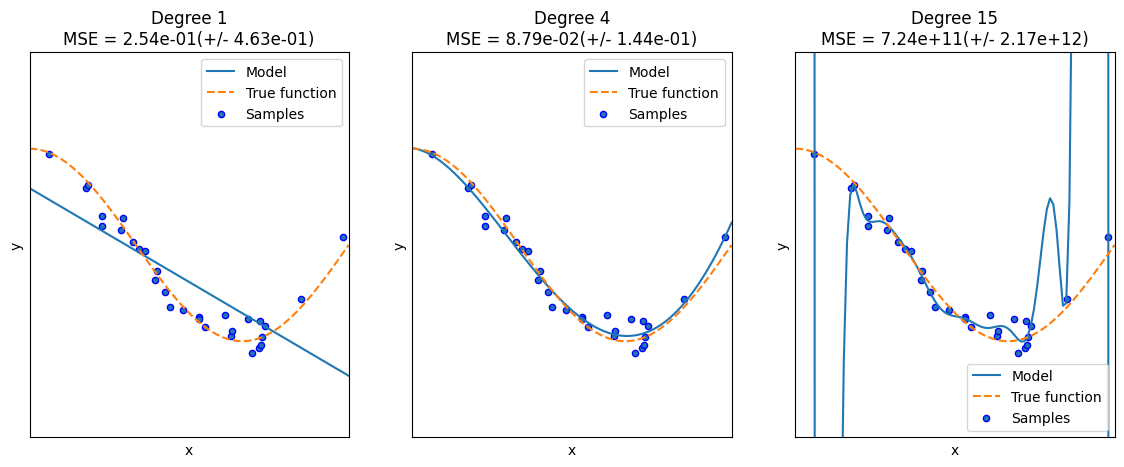

In [109]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))


plt.show()

## 3 Regularized Linear Models – Ridge, Lasso, ElasticNet

### 3.1 Ridge regression

In [110]:
# 데이터 로딩
df = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [111]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [112]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [113]:
ridge = Ridge(alpha=10)   # alpha = 가중치에 해당
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [114]:
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE: {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE: 5.518 


In [117]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {} 일 때 5 folds 의 평균 RMSE : {:.3f}'.format(alpha ,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


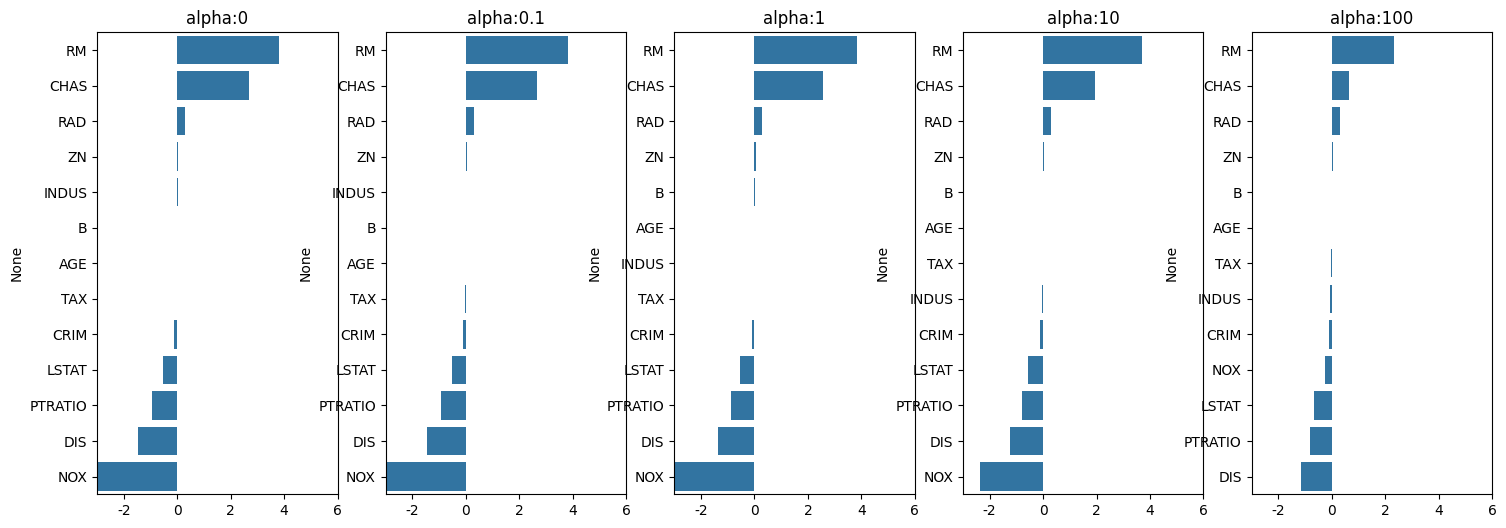

In [125]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=df.drop('target',axis=1).columns )
    colname='alpha:'+ str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [126]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
